In [296]:

import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline
import plotly.express as px
sns.set_style('darkgrid')

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import plotly.express as px


## Wczytanie danych.

In [297]:
df = pd.read_csv('german_credit_data.csv', sep=';', encoding='latin-1')

In [298]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [299]:
df.shape

(2003, 21)

In [300]:
nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2)
print(nulls_summary)

                        Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
checking_status         False                   0               0.0
duration                 True                   2               0.1
credit_history           True                   2               0.1
purpose                  True                   2               0.1
credit_amount            True                   2               0.1
savings_status           True                   2               0.1
employment               True                   2               0.1
installment_commitment   True                   2               0.1
personal_status          True                   2               0.1
other_parties            True                   2               0.1
residence_since          True                   2               0.1
property_magnitude       True                   2               0.1
age                      True                   2               0.1
other_payment_plans      True                   

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         2003 non-null   object
 1   duration                2001 non-null   object
 2   credit_history          2001 non-null   object
 3   purpose                 2001 non-null   object
 4   credit_amount           2001 non-null   object
 5   savings_status          2001 non-null   object
 6   employment              2001 non-null   object
 7   installment_commitment  2001 non-null   object
 8   personal_status         2001 non-null   object
 9   other_parties           2001 non-null   object
 10  residence_since         2001 non-null   object
 11  property_magnitude      2001 non-null   object
 12  age                     2001 non-null   object
 13  other_payment_plans     2001 non-null   object
 14  housing                 2001 non-null   object
 15  exis

In [302]:
df['credit_history'].unique()

array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid', nan,
       'credit_history'], dtype=object)

In [303]:
df['existing_credits'].unique()

array(['2', '1', '3', '4', nan, 'existing_credits'], dtype=object)

In [304]:
df['savings_status'].unique()

array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500',
       nan, 'savings_status'], dtype=object)

## Czyszczenie danych.

In [305]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1998     True
1999     True
2000     True
2001     True
2002    False
Length: 2003, dtype: bool

In [306]:
_df = df.drop_duplicates()\
    .drop(2002, axis=0)\
    .drop(1001, axis=0)\
    .drop(1000, axis=0)\
    .rename(columns={'personal_status':'sex'})\
    .rename(columns={'class':'risk'})
   
_df
    


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,sex,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [307]:
# zmiana typów object na int64
_df['age'] = _df['age'].astype(np.int64)
_df['credit_amount'] = _df['credit_amount'].astype(np.int64)
_df['duration'] = _df['duration'].astype(np.int64)
_df['installment_commitment']=_df['installment_commitment'].astype(np.int64)
_df['residence_since']=_df['residence_since'].astype(np.int64)
_df['existing_credits']=_df['existing_credits'].astype(np.int64)
_df['num_dependents']=_df['num_dependents'].astype(np.int64)


In [308]:
status_replase = ['male','female']
status_job = ['unskilled/non-resident', 'unskilled/resident', 'skilled', 'highly skilled']

In [309]:
personal_status_replase = {'male single': 'male', 'female div/dep/mar': 'female', 'male div/sep': 'male',
       'male mar/wid': 'male'}
job_status_replase = {'unemp/unskilled non res': 'unskilled/non-resident','unskilled resident':'unskilled/resident', 'skilled': 'skilled', 'high qualif/self emp/mgmt': 'highly skilled'}

_df.replace(personal_status_replase, inplace=True)
_df.replace(job_status_replase, inplace=True)
_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,sex,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male,none,...,real estate,49,none,own,1,unskilled/resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [310]:
#Zmiana zależnej zmiennej kategorycznej na numeryczną
_df['risk']=_df['risk'].replace('good', 1)
_df['risk']=_df['risk'].replace('bad', 0)

_df['risk'].value_counts()

risk
1    700
0    300
Name: count, dtype: int64

In [311]:
_df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
sex                       object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
risk                       int64
dtype: object

In [312]:
_df['checking_status'].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

In [313]:
_df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


#### Opis kolumn:

* **age** (int)
* **sex** (male, female)
* **job** (unskilled and non-resident, unskilled and resident, skilled, highly skilled)
* **housing** (own, rent, or free)
* **savings_status**  (no known savings, <100, 500<=X<1000, >=1000, 100<=X<500)
* **credit_history** (critical/other existing credit, existing paid, delayed previously, no credits/all paid, all paid)
* **duration** (int, in month)
* **purpose** ( used car, new car, furniture/equipment, radio/TV, domestic appliance, repairs, education, business, other, retraining)
* **credit_amount** (int)
* **checking_status** (<0, 0<=X<200, no checking, >=200)
* **employment** (>=7, 1<=X<4, 4<=X<7, unemployed, <1)
* **installment_commitment** (4, 2, 3, 1)
* **other_parties** (none, guarantor, co applicant)
* **residence_since** (4, 2, 3, 1)
* **property_magnitude** (real estate, life insurance, no known property, car)
* **other_payment_plans** (none, bank, stores)
* **existing_credits** (1, 2, 3, 4)
* **num_dependents** (1, 2)
* **own_telephone** (yes, none)
* **foreign_worker** (yes, no)
* **risk** (1, 0)

## Kodowanie zmiennych kategorycznych za pomocą LabelEncoder

In [314]:
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [315]:
categorical_feature_mask = _df.dtypes==object
categorical_cols = _df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'sex', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']


In [316]:
le = LabelEncoder()
_df[categorical_cols] = _df[categorical_cols].apply(lambda col: le.fit_transform(col))
_df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,sex,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,1,6,1,6,1169,4,3,4,1,2,...,3,67,1,1,2,1,1,1,1,1
1,0,48,3,6,5951,2,0,2,0,2,...,3,22,1,1,1,1,1,0,1,0
2,3,12,1,2,2096,2,1,2,1,2,...,3,49,1,1,1,3,2,0,1,1
3,1,42,3,3,7882,2,1,2,1,1,...,1,45,1,0,1,1,2,0,1,1
4,1,24,2,4,4870,2,0,3,1,2,...,2,53,1,0,2,1,2,0,1,0
5,3,36,3,2,9055,4,0,2,1,2,...,2,35,1,0,1,3,2,1,1,1
6,3,24,3,3,2835,1,3,3,1,2,...,1,53,1,1,1,1,1,0,1,1
7,0,36,3,9,6948,2,0,2,1,2,...,0,35,1,2,1,0,1,1,1,1
8,3,12,3,6,3059,3,1,2,1,2,...,3,61,1,1,1,3,1,0,1,1
9,0,30,1,4,5234,2,4,4,1,2,...,0,28,1,1,2,0,1,0,1,0


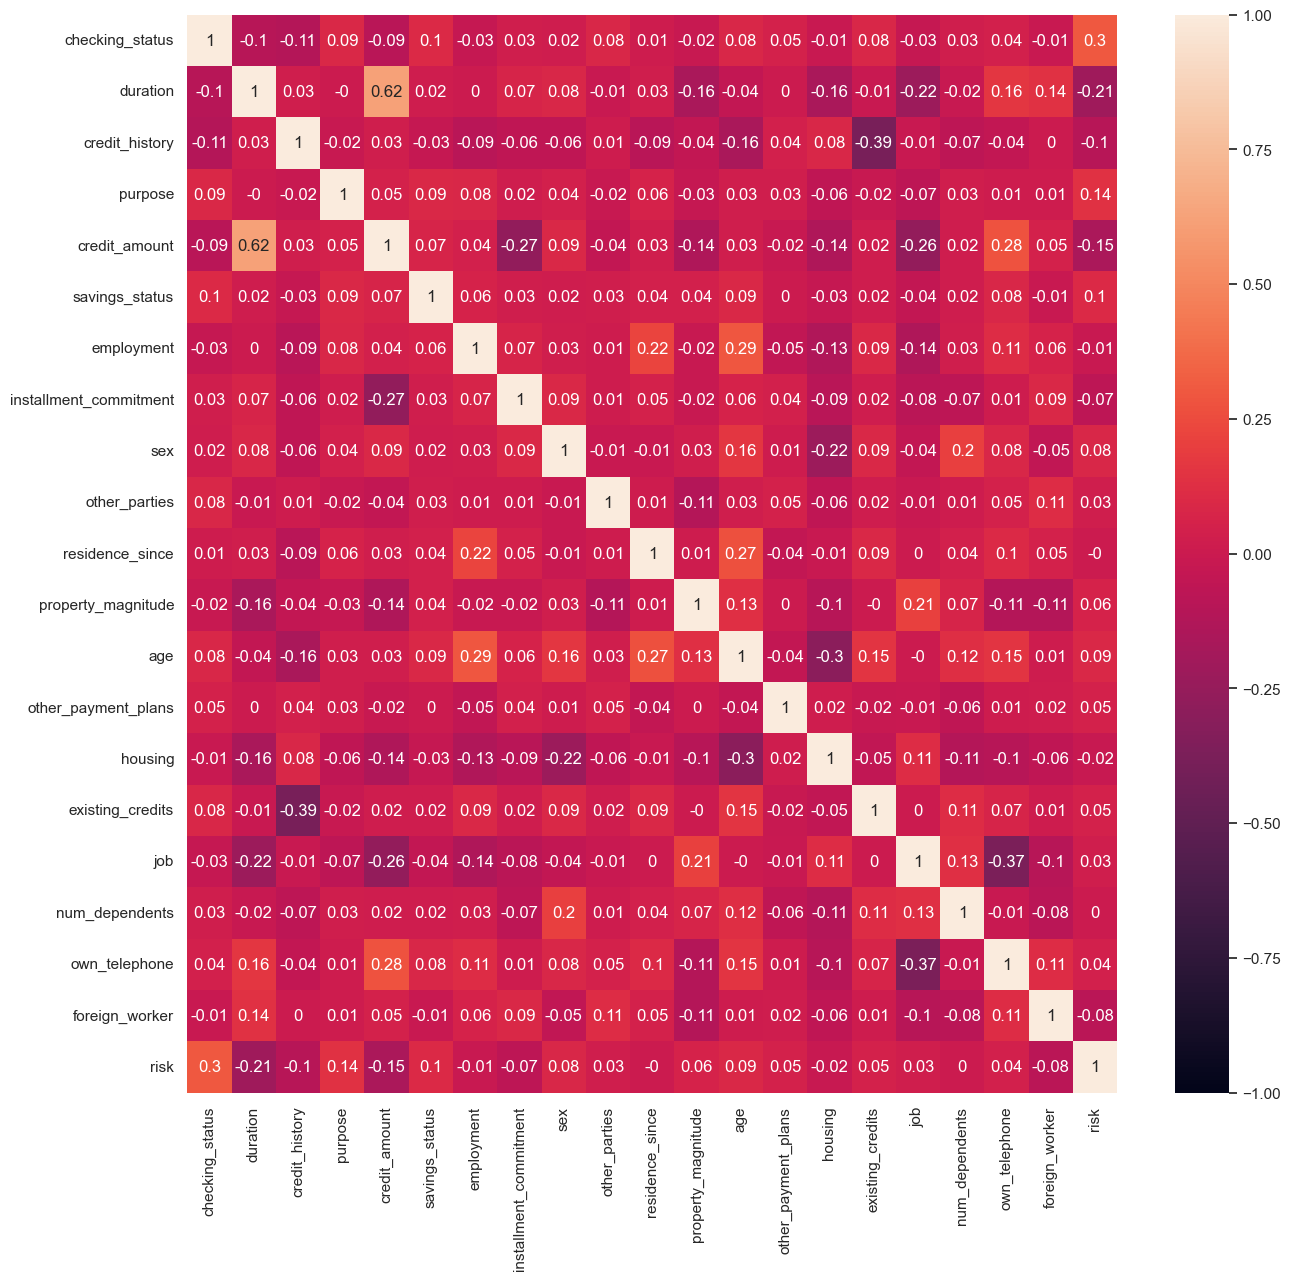

In [317]:
correlation_matrix = np.round(_df.corr(),2) # policzenie korelacji
sns.set(rc={'figure.figsize':(15,14)}) # określenie rozmiaru rysunku
sns.heatmap(correlation_matrix, vmin=-1.,vmax=1.,annot=True) # wykonanie wykresu

pass

 ### Uogólnione modele liniowe -GML

In [318]:
formula = 'risk ~ checking_status+duration+credit_history+purpose+credit_amount+savings_status+employment+installment_commitment+sex+other_parties+residence_since+property_magnitude+age+other_payment_plans+housing+existing_credits+job+num_dependents+own_telephone+foreign_worker'
model_glm = smf.glm(formula = formula, data=_df, family=sm.families.Binomial())
result = model_glm.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   risk   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      979
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -515.07
Date:                Mon, 19 Jun 2023   Deviance:                       1030.1
Time:                        17:31:50   Pearson chi2:                     940.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1743
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

P>|z| jest jedną z najważniejszych statystyk w podsumowaniu GML. Wykorzystuje statystykę z do obliczenia wartości p , która jest miarą prawdopodobieństwa, że współczynnik jest mierzony przez nasz model przez przypadek. 
Progiem istotności statystycznej jest wartość równa bądź mniejsza 5% (p<0,05).

[0,025 i 0,975] to pomiary wartości naszych współczynników w granicach 95% naszych danych lub w granicach dwóch odchyleń standardowych. Poza tymi wartościami można ogólnie uznać wartości odstające.


Na podstawie wyników GLM wybrano tylko 7 cech z wartością p < 0,05. Zmienna risk ma wpływ na zmienne zależne.

In [319]:
formula2 = 'risk ~ checking_status+duration+purpose+credit_amount+savings_status+installment_commitment+sex'
model_glm2 = smf.glm(formula = formula2, data=_df, family=sm.families.Binomial())
result2 = model_glm2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   risk   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      992
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -525.11
Date:                Mon, 19 Jun 2023   Deviance:                       1050.2
Time:                        17:31:50   Pearson chi2:                     959.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1576
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

# Budowa modelu

## Train Test Split

In [320]:
from sklearn.model_selection import train_test_split

X = _df[['checking_status' , 'sex', 'credit_amount', 'checking_status', 'installment_commitment', 'duration','purpose']]
y = _df['risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [321]:
y_test

131    0
203    0
50     1
585    0
138    1
      ..
369    1
528    0
449    0
119    1
773    1
Name: risk, Length: 330, dtype: int64

## Skalowanie cech - standaryzacja

In [322]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [323]:
print (y_train.value_counts(), '\n \n \n', y_test.value_counts())

risk
1    477
0    193
Name: count, dtype: int64 
 
 
 risk
1    223
0    107
Name: count, dtype: int64


## Metoda SMOTE

Jednym ze sposobów walki z problemem nadpróbkowania jest generowanie nowych próbek w klasach, które są niedostatecznie reprezentowane. 
SMOTE może łączyć wartości wewnętrzne i odstające.
Algorytm SMOTE znajduje rekord podobny do rekordu i tworzy syntetyczny rekord, którego waga jest uśredniana losowo na bazie wag rekordu oryginalnego i najbliższych sąsiadów; wagi generowane są niezależnie dla każdego predykatora. Liczba stworzonych syntetycznych, nadpróbkowanych rekordów zależy od wskaźnika nadpróbkowania wymaganego do oszacowanego zbilansowania w odniesieniu do klasy wynikowej. 

In [324]:
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [325]:
print (y_train.value_counts(), '\n \n \n', y_test.value_counts())

risk
1    477
0    477
Name: count, dtype: int64 
 
 
 risk
1    223
0    107
Name: count, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


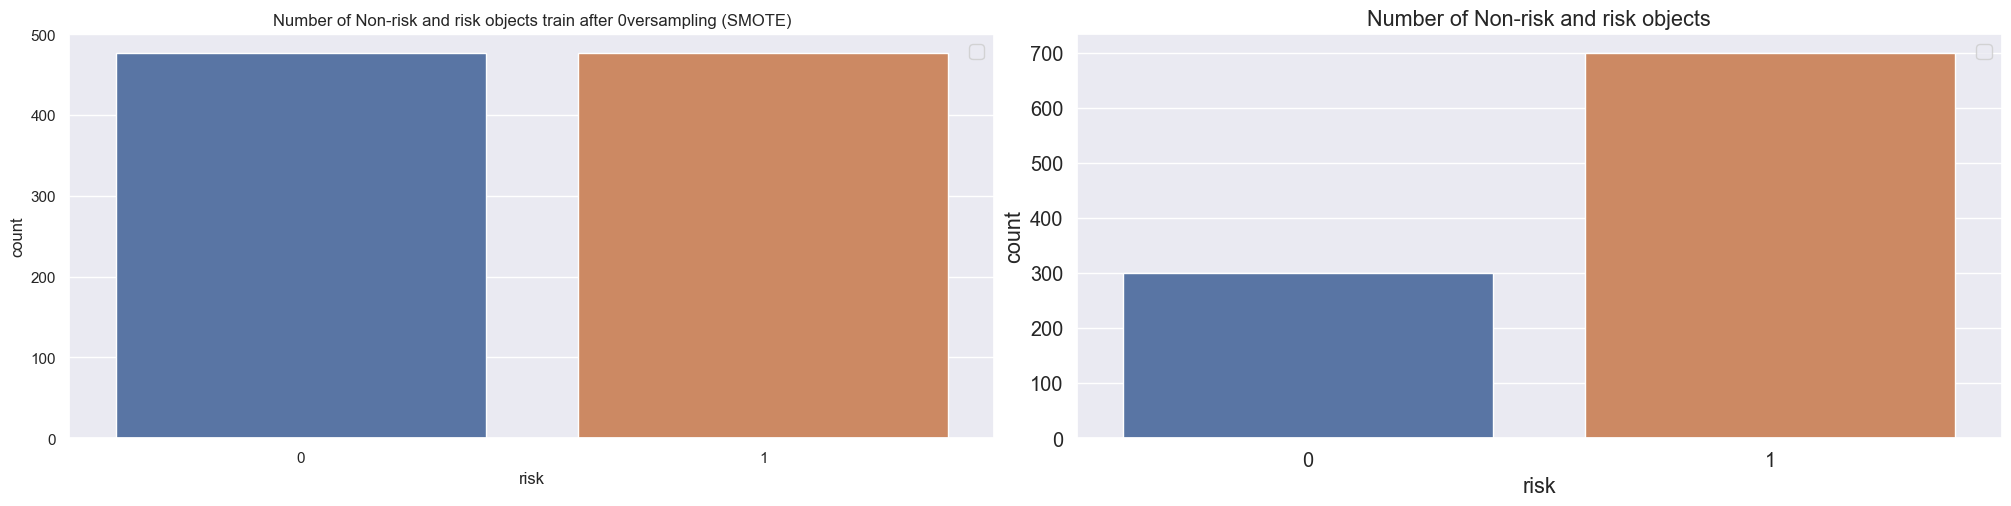

In [326]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout = True, figsize = (20,9))

grid = gridspec.GridSpec(ncols = 4, nrows = 2, figure = fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Number of Non-risk and risk objects train after 0versampling (SMOTE)')
sns.set(font_scale = 1.3)

sns.countplot(x=y_train, data=_df)

ax1.legend()

ax2 = fig.add_subplot(grid[0, 2:])
ax2.set_title('Number of Non-risk and risk objects')
sns.countplot(x='risk',data=_df)
sns.set(font_scale = 1.3)

ax2.legend()
plt.show();

## Sprawdzenie wielu modeli i stworzenie krótkiej listy najwydajniejszych z nich.

In [327]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## 1. Regresja logistyczna

In [328]:
log_reg = LogisticRegression(random_state=123, max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)
y_fit_train_log_reg = log_reg.predict(X_train)

c:\Users\troch\anaconda3\envs\german_credit_data\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [329]:
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score, classification_report
def evaluate(y_test,y_pred, model):
    print("Accuracy Score(train):", accuracy_score(model.predict(X_train), y_train))
    print("Accuracy Score(test):", accuracy_score(model.predict(X_test), y_test)) 
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('F1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy Score(train): 0.7285115303983228
Accuracy Score(test): 0.6818181818181818
Accuracy Score: 0.6818181818181818
F1_score: 0.7381546134663344
Precision: 0.8314606741573034
Recall: 0.6636771300448431
Classification report:
               precision    recall  f1-score   support

           0       0.51      0.72      0.59       107
           1       0.83      0.66      0.74       223

    accuracy                           0.68       330
   macro avg       0.67      0.69      0.67       330
weighted avg       0.73      0.68      0.69       330

[0.6636771300448431]
[0.8314606741573034]


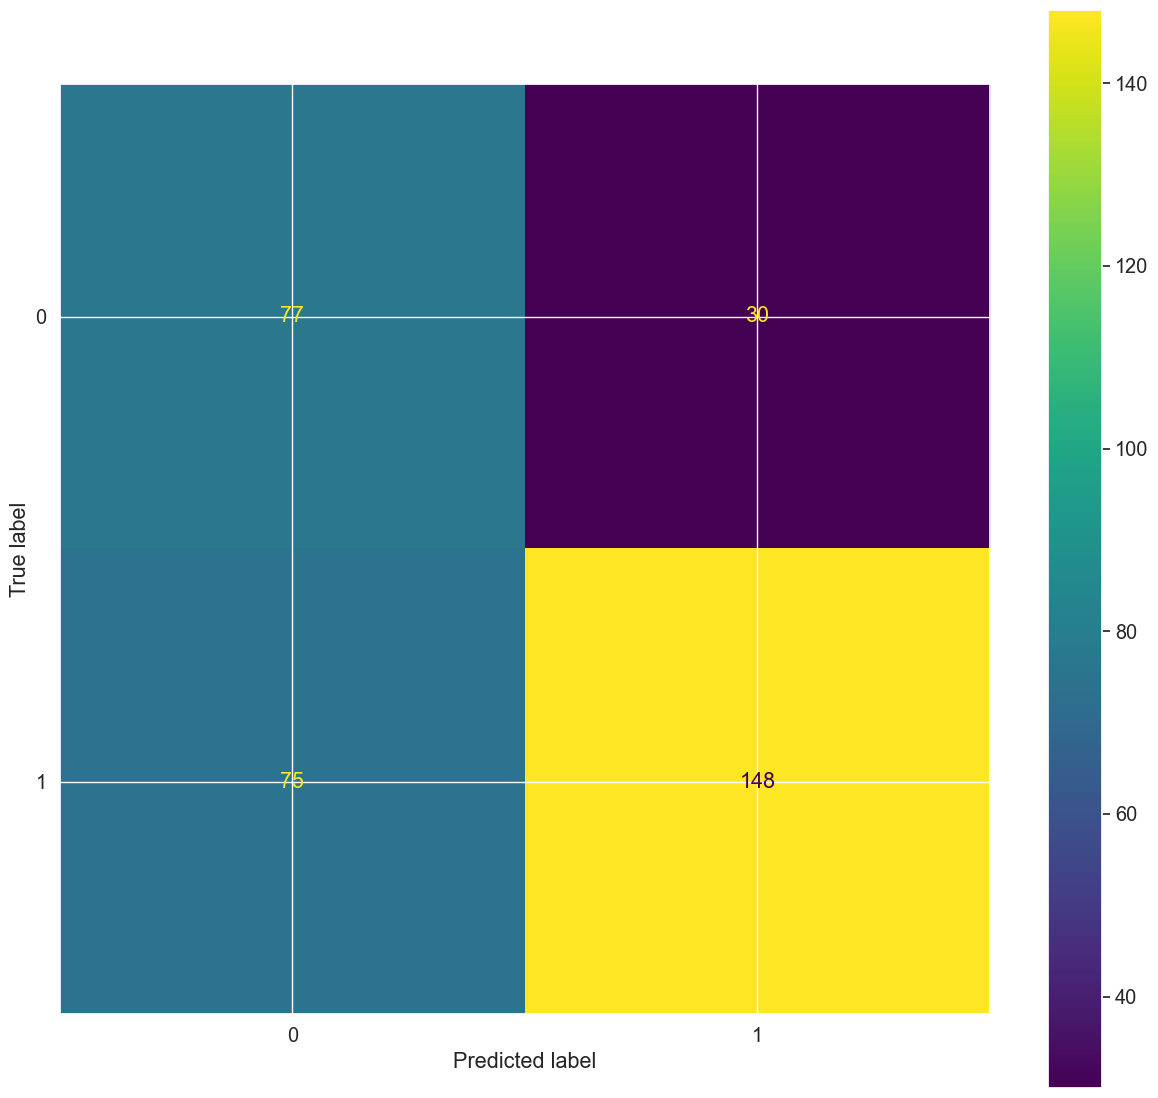

In [330]:
evaluate(y_test, y_pred_log_reg, log_reg)
recall_list = []
precision_list = []
recall_list.append(recall_score(y_test, y_pred_log_reg))
precision_list.append(precision_score(y_test, y_pred_log_reg))
print(recall_list)
print(precision_list)

In [331]:
from sklearn.metrics import roc_curve, auc

def roc_curve_plot(y_test, y_scores, method):
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = f'AUC {method} = %0.2f' % roc_auc)
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of ' + method)
    plt.rcParams['figure.figsize']=[10,5]
    return roc_auc

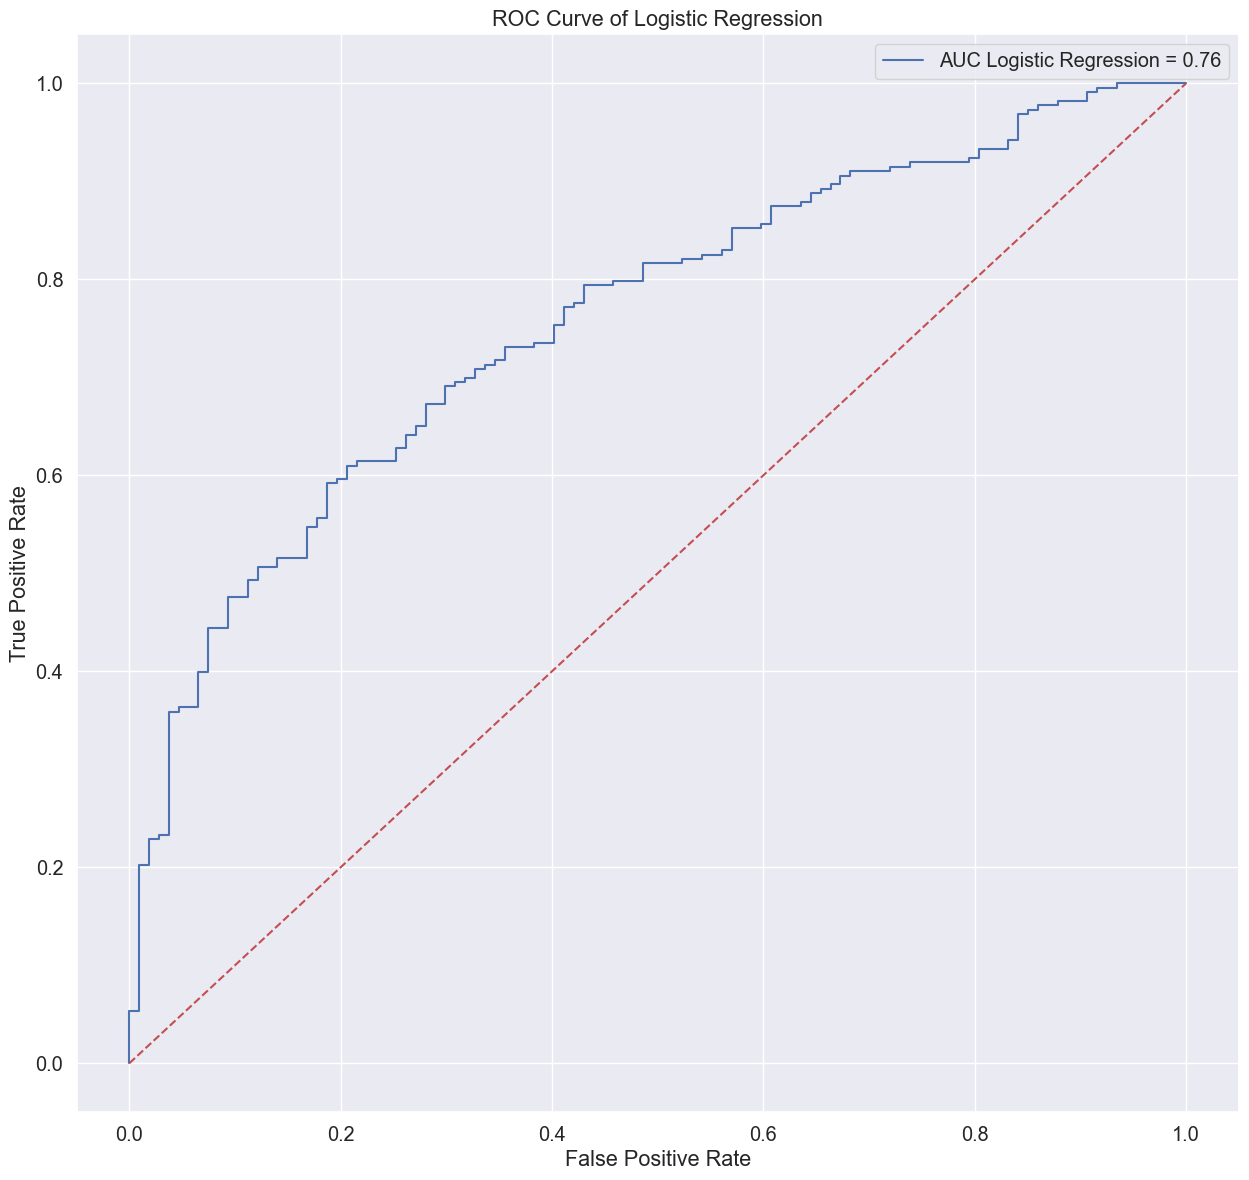

In [332]:
y_scores_log_reg = log_reg.predict_proba(X_test)
auc_log_reg = round(roc_curve_plot(y_test, y_scores_log_reg, 'Logistic Regression')*100,2)

## 2. Gaussian Naive Bayes

In [333]:
naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred_naive = naive.predict(X_test)
y_pred_proba_naive = naive.predict_proba(X_test)
y_fit_train_naive = naive.predict(X_train)

Accuracy Score(train): 0.7117400419287212
Accuracy Score(test): 0.6787878787878788
Accuracy Score: 0.6787878787878788
F1_score: 0.7150537634408602
Precision: 0.8926174496644296
Recall: 0.5964125560538116
Classification report:
               precision    recall  f1-score   support

           0       0.50      0.85      0.63       107
           1       0.89      0.60      0.72       223

    accuracy                           0.68       330
   macro avg       0.70      0.72      0.67       330
weighted avg       0.77      0.68      0.69       330

[0.6636771300448431, 0.5964125560538116]
[0.8314606741573034, 0.8926174496644296]


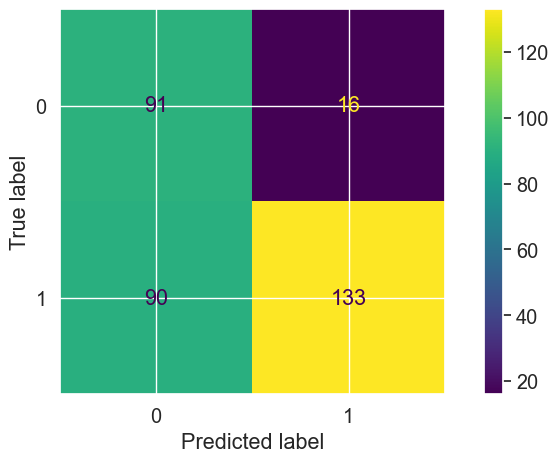

In [334]:
evaluate(y_test, y_pred_naive, naive)

recall_list.append(recall_score(y_test, y_pred_naive))
precision_list.append(precision_score(y_test, y_pred_naive))
print(recall_list)
print(precision_list)


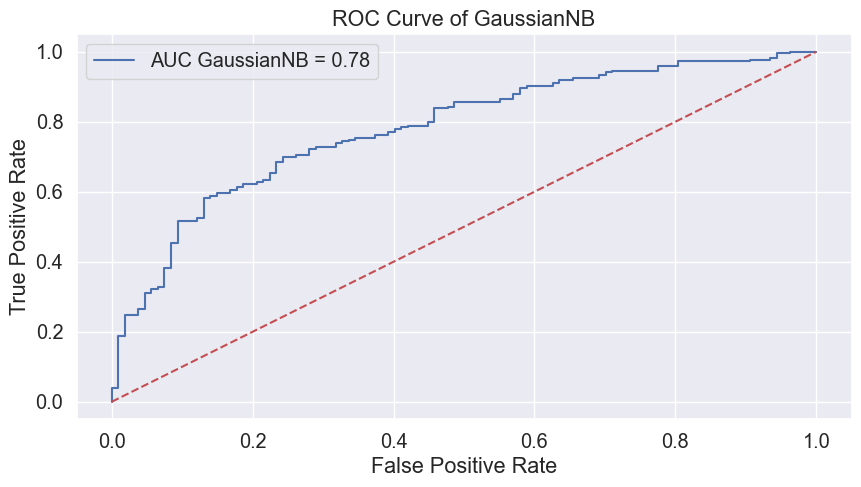

In [335]:
y_scores_naive = naive.predict_proba(X_test)
auc_naive = round(roc_curve_plot(y_test, y_scores_naive, 'GaussianNB')*100,2)

## 3. Decision Tree Classifier - gini

In [336]:
tree_g = DecisionTreeClassifier(random_state=123, criterion='gini', max_depth=5)
tree_g.fit(X_train, y_train)
y_pred_tree_g = tree_g.predict(X_test)
y_pred_proba_tree_g = tree_g.predict_proba(X_test)
y_fit_train_tree_g = tree_g.predict(X_train)

Accuracy Score(train): 0.7872117400419287
Accuracy Score(test): 0.6606060606060606
Accuracy Score: 0.6606060606060606
F1_score: 0.7113402061855669
Precision: 0.8363636363636363
Recall: 0.6188340807174888
Classification report:
               precision    recall  f1-score   support

           0       0.48      0.75      0.59       107
           1       0.84      0.62      0.71       223

    accuracy                           0.66       330
   macro avg       0.66      0.68      0.65       330
weighted avg       0.72      0.66      0.67       330

[0.6636771300448431, 0.5964125560538116, 0.6188340807174888]
[0.8314606741573034, 0.8926174496644296, 0.8363636363636363]


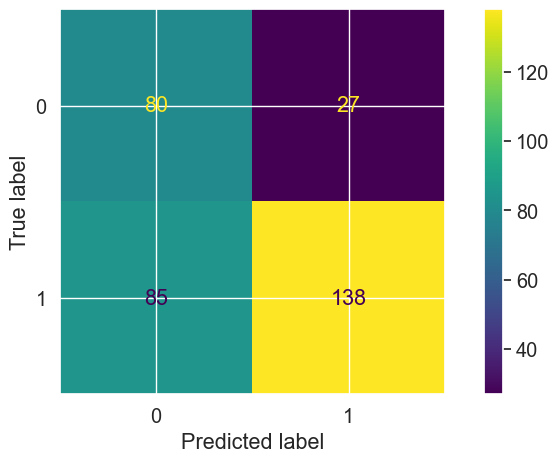

In [337]:
evaluate(y_test, y_pred_tree_g, tree_g)

recall_list.append(recall_score(y_test, y_pred_tree_g))
precision_list.append(precision_score(y_test, y_pred_tree_g))
print(recall_list)
print(precision_list)

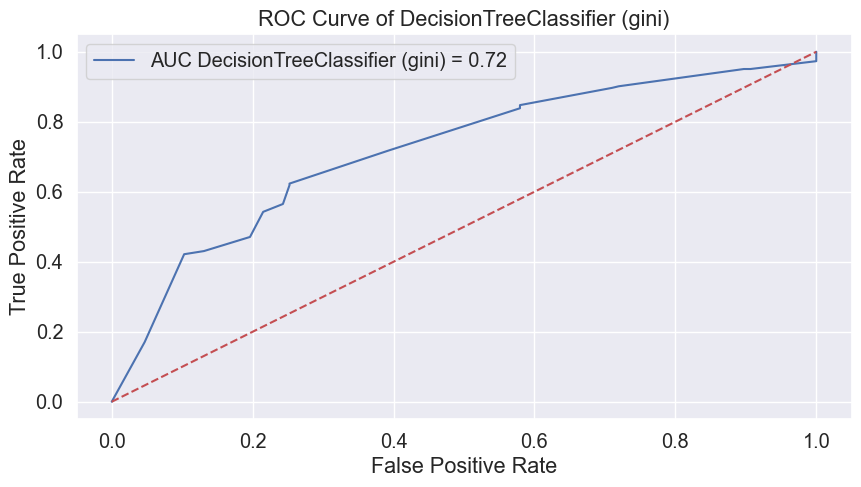

In [338]:
y_scores_tree_g = tree_g.predict_proba(X_test)
auc_tree_g = round(roc_curve_plot(y_test, y_scores_tree_g, 'DecisionTreeClassifier (gini)')*100,2)


## 3. Decision Tree Classifier - entropy

In [339]:
tree_e = DecisionTreeClassifier(random_state=123, criterion='entropy', max_depth=5)
tree_e.fit(X_train, y_train)
y_pred_tree_e = tree_e.predict(X_test)
y_pred_proba_tree_e = tree_e.predict_proba(X_test)
y_fit_train_tree_e = tree_e.predict(X_train)

Accuracy Score(train): 0.7735849056603774
Accuracy Score(test): 0.6606060606060606
Accuracy Score: 0.6606060606060606
F1_score: 0.7098445595854923
Precision: 0.8404907975460123
Recall: 0.6143497757847534
Classification report:
               precision    recall  f1-score   support

           0       0.49      0.76      0.59       107
           1       0.84      0.61      0.71       223

    accuracy                           0.66       330
   macro avg       0.66      0.69      0.65       330
weighted avg       0.73      0.66      0.67       330

[0.6636771300448431, 0.5964125560538116, 0.6188340807174888, 0.6143497757847534]
[0.8314606741573034, 0.8926174496644296, 0.8363636363636363, 0.8404907975460123]


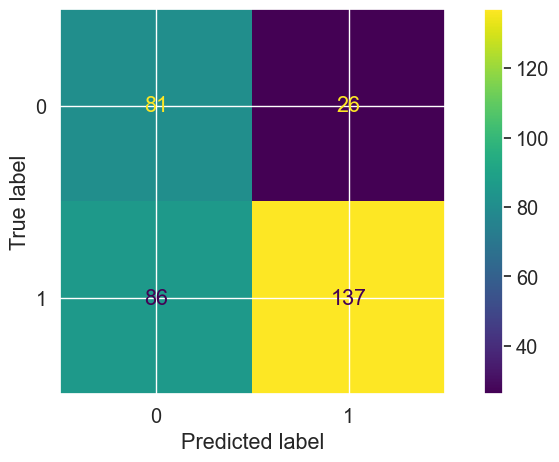

In [340]:
evaluate(y_test, y_pred_tree_e, tree_e )

recall_list.append(recall_score(y_test, y_pred_tree_e))
precision_list.append(precision_score(y_test, y_pred_tree_e))
print(recall_list)
print(precision_list)


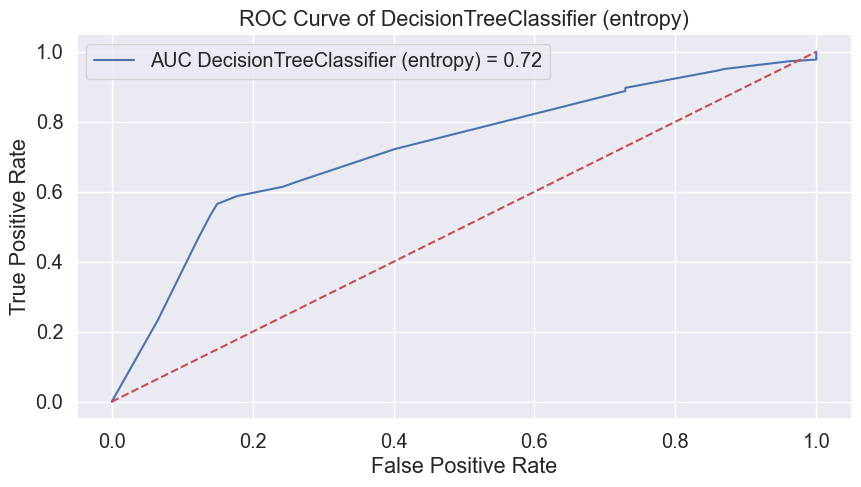

In [341]:
y_scores_tree_e = tree_e.predict_proba(X_test)
auc_tree_e = round(roc_curve_plot(y_test, y_scores_tree_e, 'DecisionTreeClassifier (entropy)')*100,2)

## 4. EXTRA TREES CLASSIFIER

In [342]:
params3 = {'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 8,
 'max_depth': 16,
 'criterion': 'entropy'}

ET_CLF = ExtraTreesClassifier(**params3)
ET_CLF.fit(X_train, y_train)
ET_pred = ET_CLF.predict(X_test)
ET_pred_p = ET_CLF.predict_proba(X_test)
ET_pred_t = ET_CLF.predict(X_train)

Accuracy Score(train): 0.9622641509433962
Accuracy Score(test): 0.6848484848484848
Accuracy Score: 0.6848484848484848
F1_score: 0.7535545023696681
Precision: 0.7989949748743719
Recall: 0.7130044843049327
Classification report:
               precision    recall  f1-score   support

           0       0.51      0.63      0.56       107
           1       0.80      0.71      0.75       223

    accuracy                           0.68       330
   macro avg       0.66      0.67      0.66       330
weighted avg       0.71      0.68      0.69       330

[0.6636771300448431, 0.5964125560538116, 0.6188340807174888, 0.6143497757847534, 0.7130044843049327]
[0.8314606741573034, 0.8926174496644296, 0.8363636363636363, 0.8404907975460123, 0.7989949748743719]


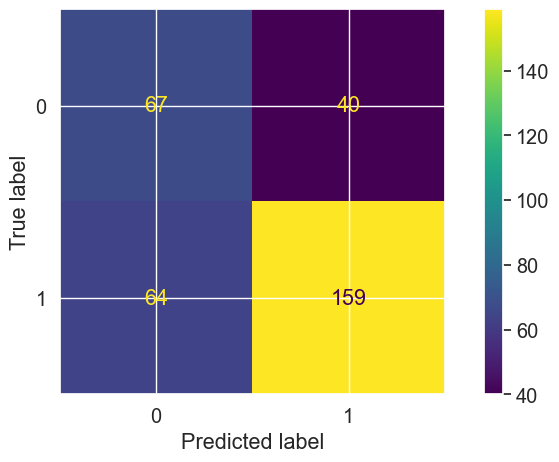

In [343]:
evaluate(y_test, ET_pred, ET_CLF)
recall_list.append(recall_score(y_test, ET_pred))
precision_list.append(precision_score(y_test, ET_pred))
print(recall_list)
print(precision_list)

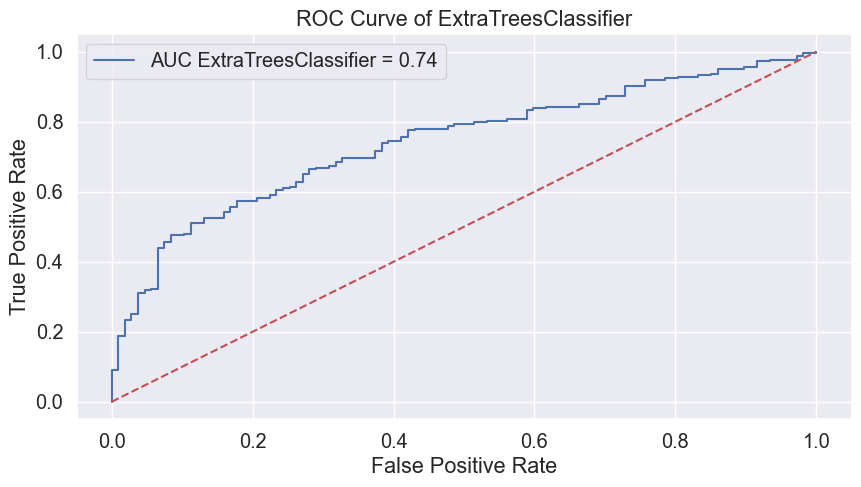

In [344]:
auc_Extratrees = round(roc_curve_plot(y_test, ET_pred_p, 'ExtraTreesClassifier')*100,2)

## 5. Random Forest Classifier

In [345]:
params = {'n_estimators': 5,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 6,
 'max_features': 6,
 'max_depth': 3,
 'criterion': 'gini'}
RFC = RandomForestClassifier(**params)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=6, max_leaf_nodes=6,
                       min_samples_leaf=6, n_estimators=5)

In [346]:
y_pred_forest = RFC.predict(X_test)
y_pred_proba_forest = RFC.predict_proba(X_test)
y_fit_train_forest = RFC.predict(X_train)

Accuracy Score(train): 0.7557651991614256
Accuracy Score(test): 0.6515151515151515
Accuracy Score: 0.6515151515151515
F1_score: 0.6997389033942559
Precision: 0.8375
Recall: 0.600896860986547
Classification report:
               precision    recall  f1-score   support

           0       0.48      0.76      0.58       107
           1       0.84      0.60      0.70       223

    accuracy                           0.65       330
   macro avg       0.66      0.68      0.64       330
weighted avg       0.72      0.65      0.66       330

[0.6636771300448431, 0.5964125560538116, 0.6188340807174888, 0.6143497757847534, 0.7130044843049327, 0.600896860986547]
[0.8314606741573034, 0.8926174496644296, 0.8363636363636363, 0.8404907975460123, 0.7989949748743719, 0.8375]


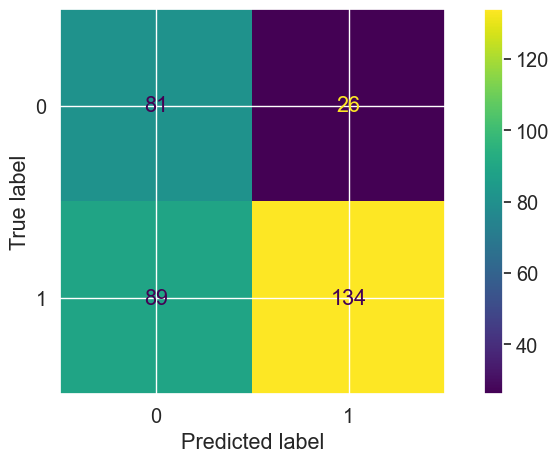

In [347]:
evaluate(y_test, y_pred_forest, RFC)
recall_list.append(recall_score(y_test, y_pred_forest))
precision_list.append(precision_score(y_test, y_pred_forest))
print(recall_list)
print(precision_list)

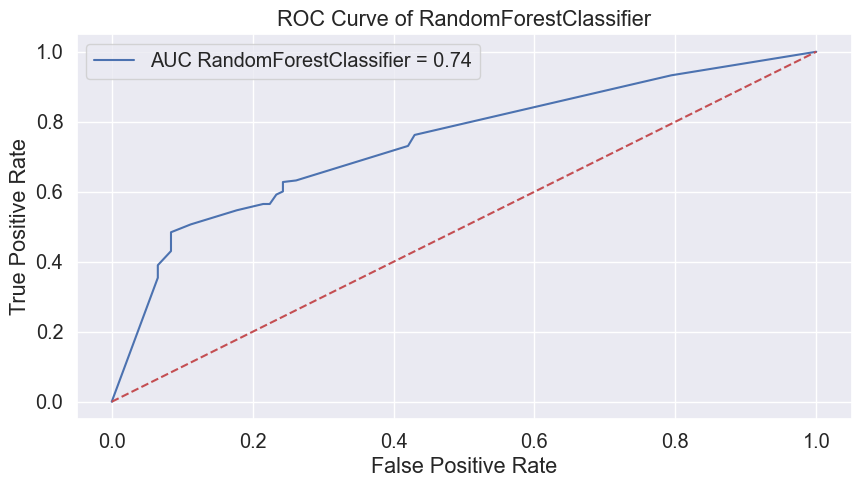

In [348]:
auc_forest_GRID = round(roc_curve_plot(y_test, y_pred_proba_forest, 'RandomForestClassifier')*100,2)

## 6. KNeighborsClassifier

In [349]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn =  knn.predict_proba(X_test)
y_fit_train_knn =  knn.predict(X_train)

Accuracy Score(train): 0.7746331236897275
Accuracy Score(test): 0.5878787878787879
Accuracy Score: 0.5878787878787879
F1_score: 0.6682926829268293
Precision: 0.732620320855615
Recall: 0.6143497757847534
Classification report:
               precision    recall  f1-score   support

           0       0.40      0.53      0.46       107
           1       0.73      0.61      0.67       223

    accuracy                           0.59       330
   macro avg       0.57      0.57      0.56       330
weighted avg       0.62      0.59      0.60       330

[0.6636771300448431, 0.5964125560538116, 0.6188340807174888, 0.6143497757847534, 0.7130044843049327, 0.600896860986547, 0.6143497757847534]
[0.8314606741573034, 0.8926174496644296, 0.8363636363636363, 0.8404907975460123, 0.7989949748743719, 0.8375, 0.732620320855615]


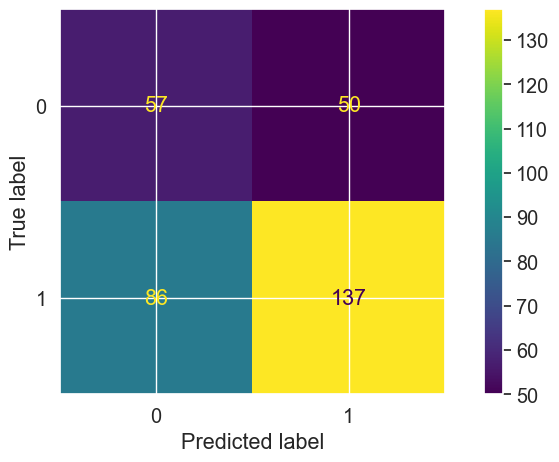

In [350]:
evaluate(y_test, y_pred_knn, knn )

recall_list.append(recall_score(y_test, y_pred_knn))
precision_list.append(precision_score(y_test, y_pred_knn))
print(recall_list)
print(precision_list)

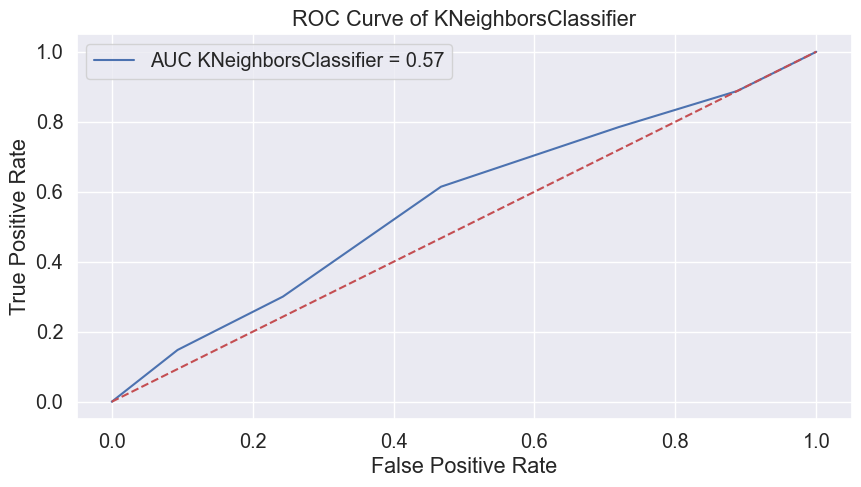

In [351]:
y_scores_knn =  knn.predict_proba(X_test)
auc_knn = round(roc_curve_plot(y_test, y_scores_knn, 'KNeighborsClassifier')*100,2)

## 7. AdaBoostClassifier

In [352]:
abc=AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)
y_pred_proba_abc =  abc.predict_proba(X_test)
y_fit_train_abc =  abc.predict(X_train)

Accuracy Score(train): 0.7955974842767296
Accuracy Score(test): 0.7090909090909091
Accuracy Score: 0.7090909090909091
F1_score: 0.7658536585365855
Precision: 0.839572192513369
Recall: 0.7040358744394619
Classification report:
               precision    recall  f1-score   support

           0       0.54      0.72      0.62       107
           1       0.84      0.70      0.77       223

    accuracy                           0.71       330
   macro avg       0.69      0.71      0.69       330
weighted avg       0.74      0.71      0.72       330

[0.6636771300448431, 0.5964125560538116, 0.6188340807174888, 0.6143497757847534, 0.7130044843049327, 0.600896860986547, 0.6143497757847534, 0.7040358744394619]
[0.8314606741573034, 0.8926174496644296, 0.8363636363636363, 0.8404907975460123, 0.7989949748743719, 0.8375, 0.732620320855615, 0.839572192513369]


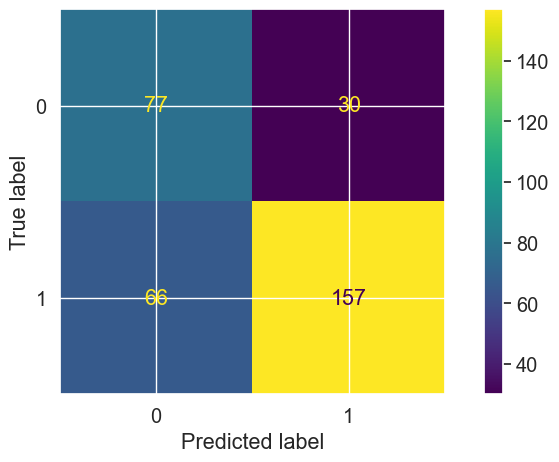

In [353]:
evaluate(y_test, y_pred_abc, abc)

recall_list.append(recall_score(y_test, y_pred_abc))
precision_list.append(precision_score(y_test, y_pred_abc))
print(recall_list)
print(precision_list)

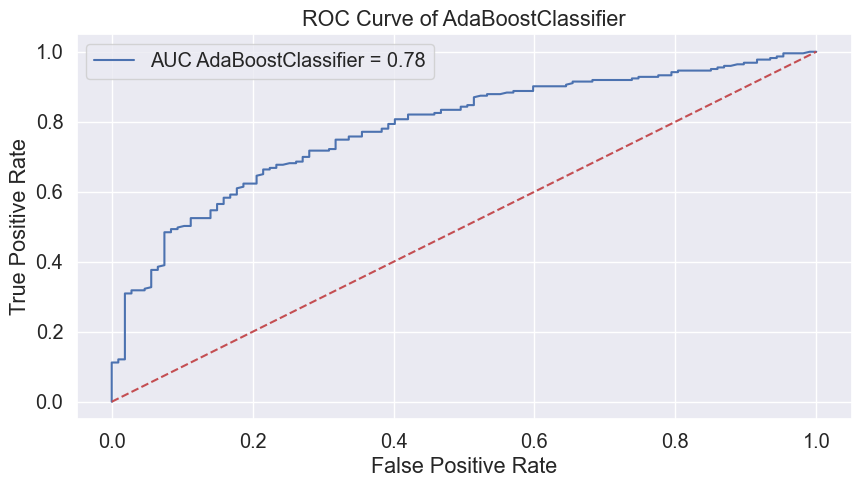

In [354]:
y_scores_abc =  abc.predict_proba(X_test)
auc_abc = round(roc_curve_plot(y_test, y_scores_abc, 'AdaBoostClassifier')*100,2)

## Podsumowanie medeli:
Mertyki skuteczności:
- AUC ROC,
- recall

In [355]:
def roc_curve_plot(y_test, y_scores, method, color):
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = f'AUC {method} = %0.2f' % roc_auc, c= color)
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('Odsetek fałszywie pozytywnych', fontsize=20)
    plt.ylabel('Odsetek prawdziwie pozytywnych', fontsize=20)
    plt.title('ROC Curve')
    plt.rcParams['figure.figsize']=[25,12]
    return roc_auc

C:\Users\troch\AppData\Local\Temp\ipykernel_9772\3804975276.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = f'AUC {method} = %0.2f' % roc_auc, c= color)
C:\Users\troch\AppData\Local\Temp\ipykernel_9772\3804975276.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = f'AUC {method} = %0.2f' % roc_auc, c= color)
C:\Users\troch\AppData\Local\Temp\ipykernel_9772\3804975276.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take preceden

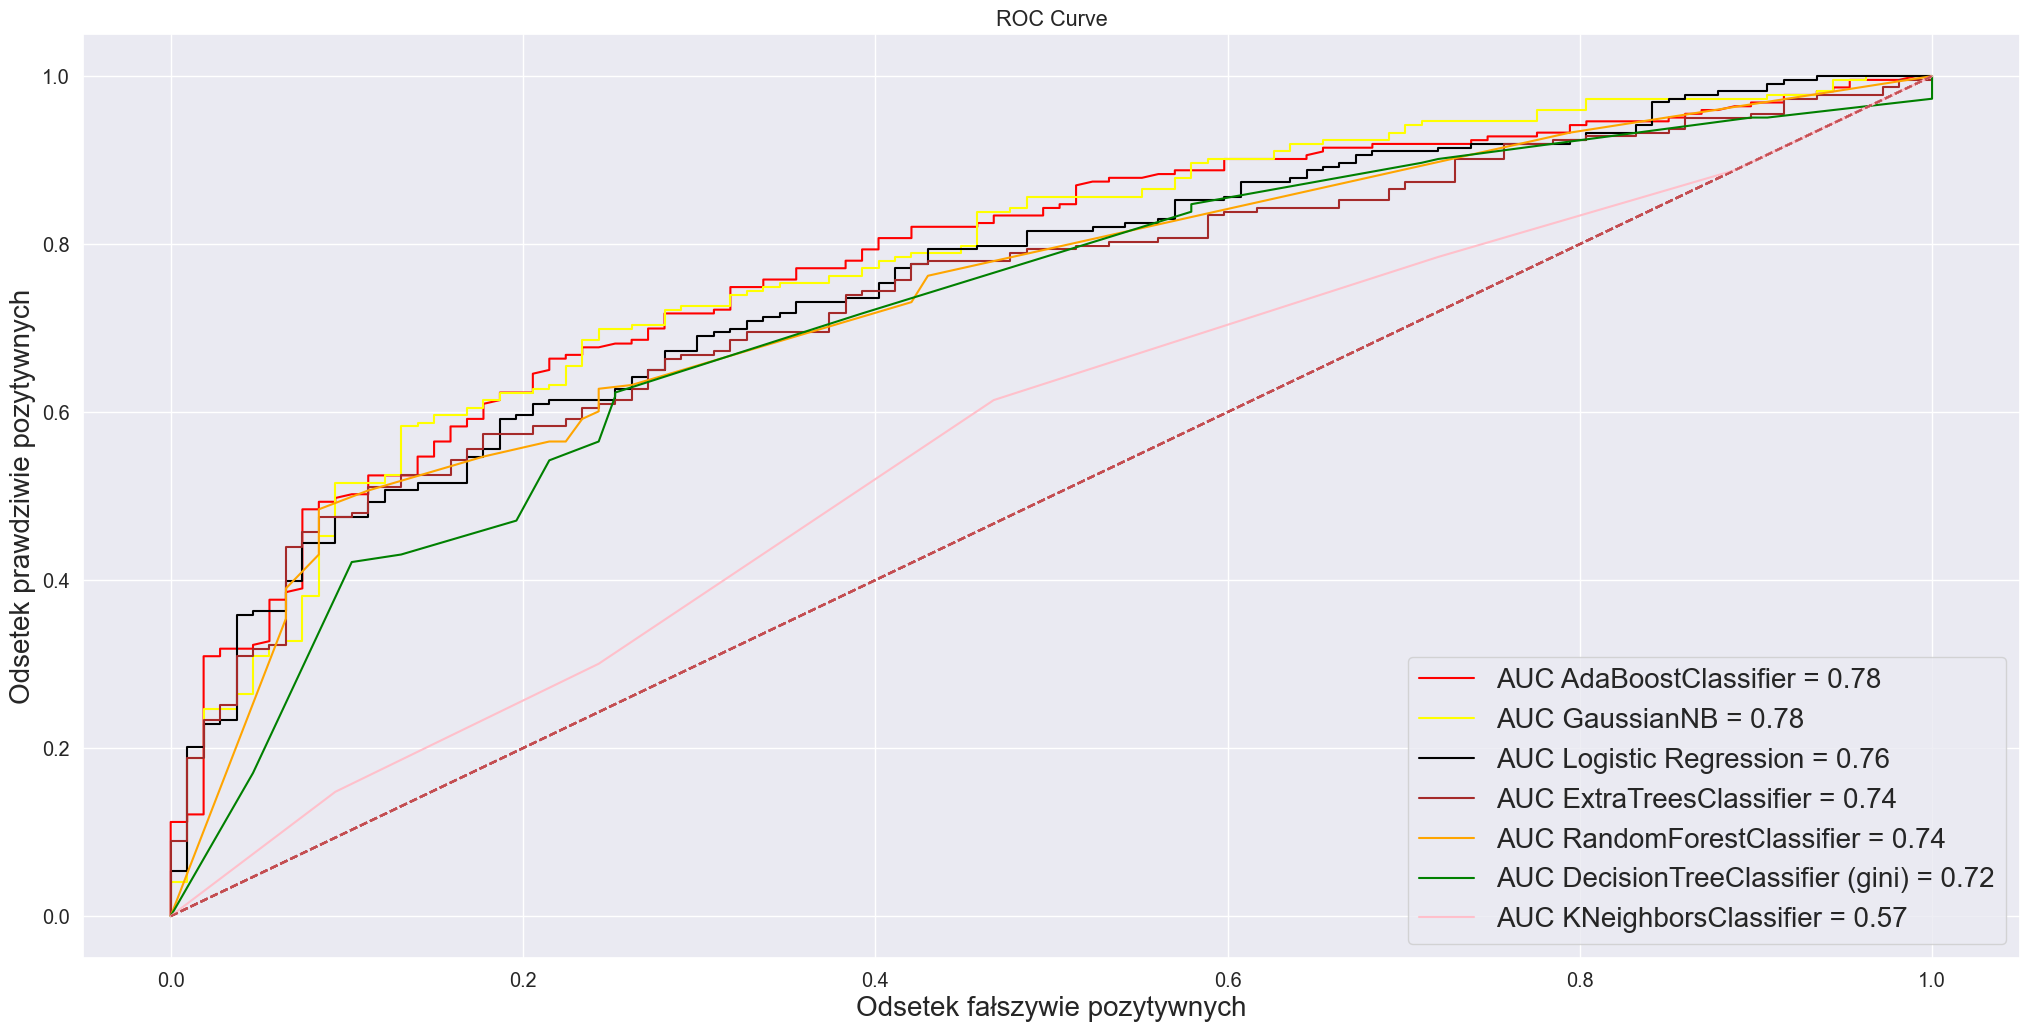

In [367]:

auc_abc = round(roc_curve_plot(y_test, y_pred_proba_abc, 'AdaBoostClassifier', "red")*100,2,)
auc_naive = round(roc_curve_plot(y_test, y_pred_proba_naive, 'GaussianNB', "yellow")*100,2)
auc_log_reg = round(roc_curve_plot(y_test, y_pred_proba_log_reg, 'Logistic Regression', "black")*100,2)
auc_Extratrees = round(roc_curve_plot(y_test, ET_pred_p, 'ExtraTreesClassifier', "brown")*100,2)
auc_forest_GRID = round(roc_curve_plot(y_test, y_pred_proba_forest, 'RandomForestClassifier', "orange")*100,2)
auc_tree_g = round(roc_curve_plot(y_test, y_pred_proba_tree_g, 'DecisionTreeClassifier (gini)',  "green")*100,2)
auc_knn = round(roc_curve_plot(y_test, y_pred_proba_knn, 'KNeighborsClassifier', "pink")*100,2)
plt.legend(loc="lower right", fontsize=20)
plt.show()


Metryką skuteczności jest Krzywa ROC, która określa kompromis między czułością a swoistością. Znalezienie większej liczy 1 oznacza, że błędnie zaklasyfikowano 0 jako 1. Idealny klasyfikator klasyfikowałby wszystkie 1 bez błędów prognozy dla 0 jako 1.Krzywa ROC przedstawia czułość na osi y w zależności od swoistości na osi x. Przerywana przekątna odpowiada klasyfikatorowi nie lepszemu niż losowy. Ekstremalnie efektywny klasyfikator będzie tworzył krzywą ROC usytuowaną blisko lewego górnego rogu wykresu, będzie klasyfikować wiele 1 bez błędów dla 0. Jednym ze sposobów porównywania klasyfikatorów jest pomiar obszaru pod krzywą (AUC). Obszar doskonałego klasyfikatora byłby równy 1.
Swoistość (ang. Specificity) mierzy zdolność modelu do prognozowania wyników negatywnych.
Najlepszymi klasyfikatorami pod względem metryki AUC ROC okazały się AdaBoost, GaussianNB, Regresja Logistyczna. 



In [357]:
dictionary = {
    log_reg: 'LogisticRegression',
    naive: 'GaussianNB',
    tree_g: 'DecisionTreeClassifier (gini)',
    tree_e: 'DecisionTreeClassifier (entropy)',
    ET_CLF: "ExtraTreesClassifier",
    RFC: 'RandomForestClassifier',
    knn: "KNeighborsClassifier",
    abc: "AdaBoostClassifier",
}

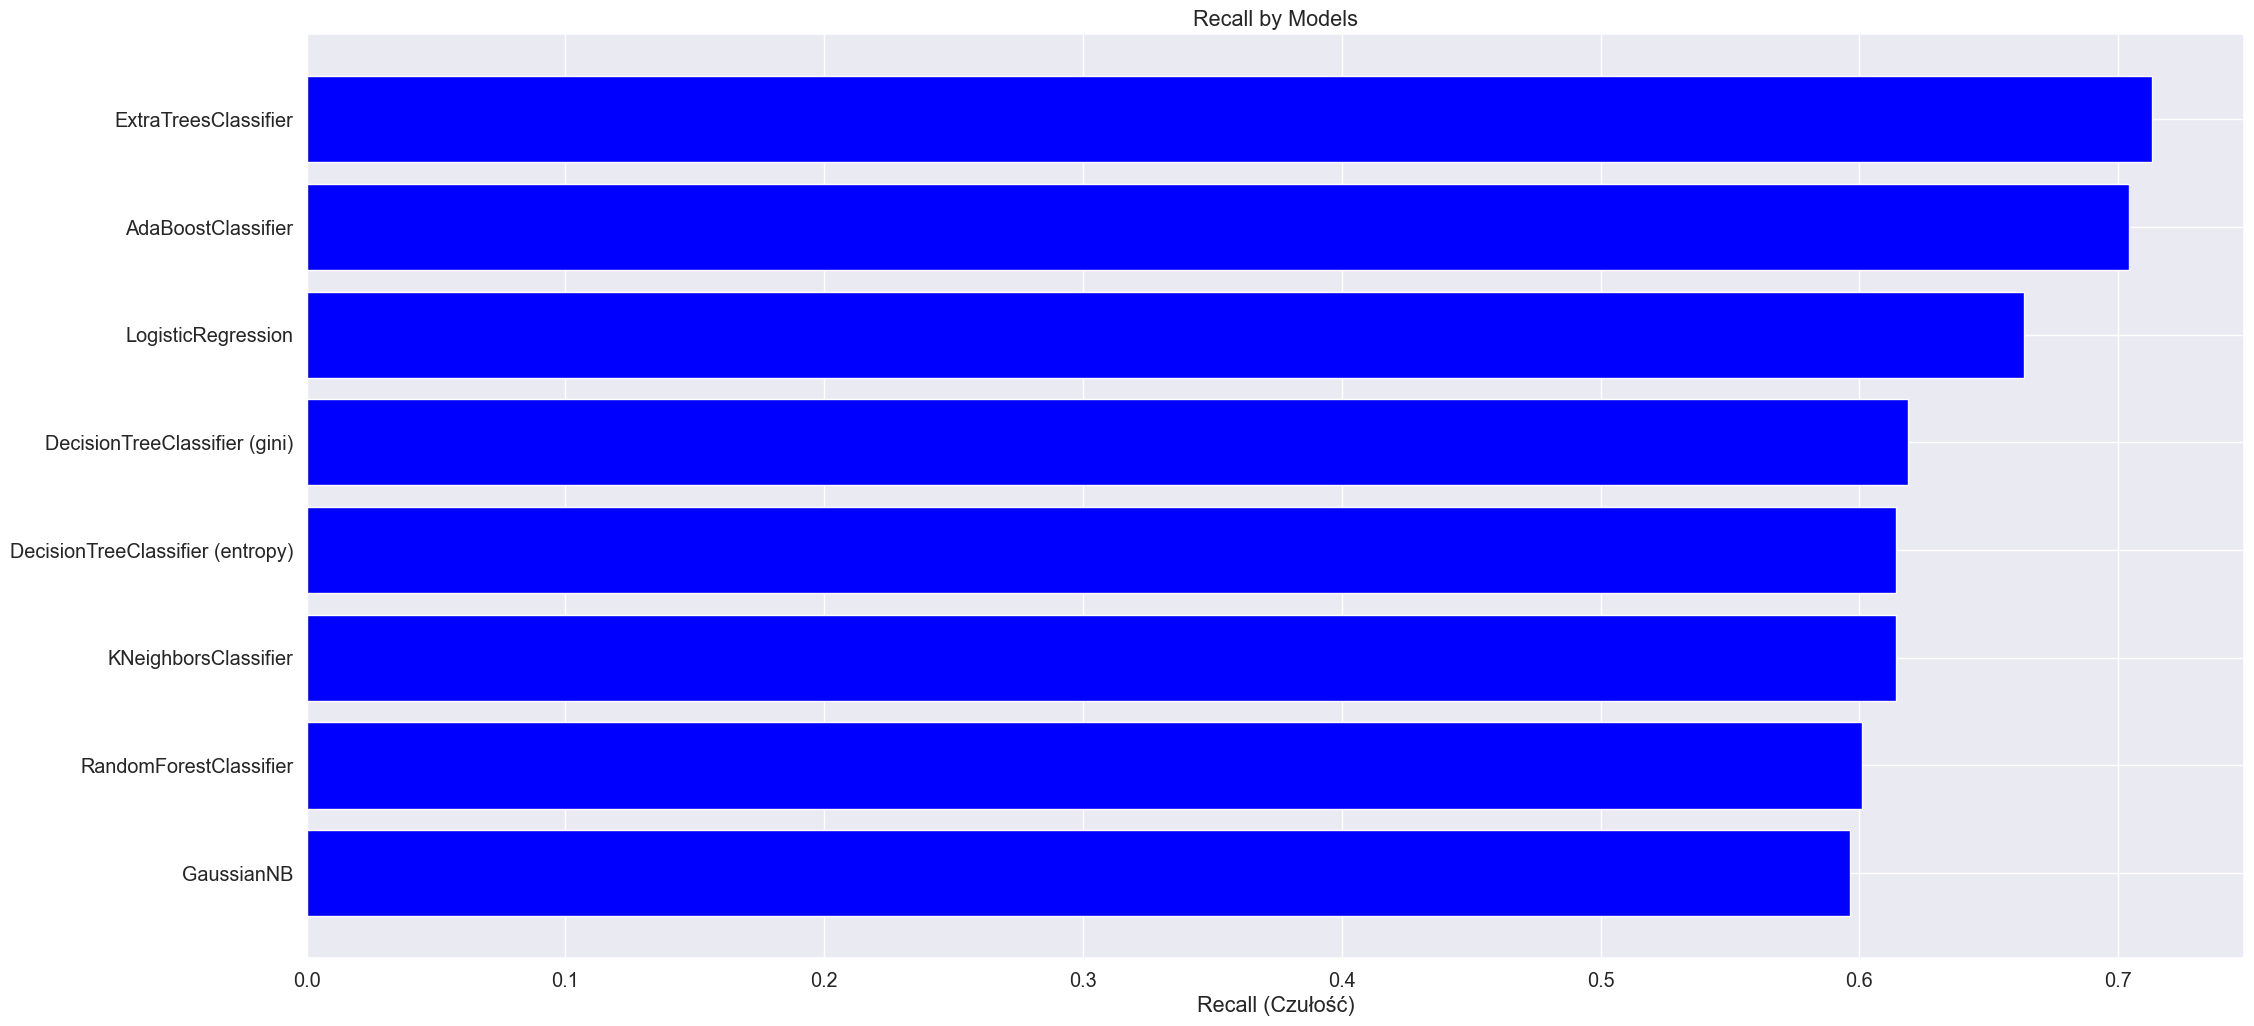

In [358]:
df = pd.DataFrame(recall_list, index=list(dictionary.values()), columns=['recall_list'])
df['recall_list'] = recall_list
df = df.sort_values(by='recall_list', ascending=False)

# Plot the recall
plt.barh(df.index, df['recall_list'], color='blue', )
plt.gca().invert_yaxis()
plt.xlabel('Recall (Czułość)')
plt.title('Recall by Models')

fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize=12,
         color='grey', ha='right', va='bottom',
         alpha=0.7)
plt.show() 

In [359]:
left_df = pd.DataFrame(recall_list, index=list(dictionary.values()), columns=['recall_list'])
left_df['recall_list'] = recall_list
right_df = pd.DataFrame(precision_list, index=list(dictionary.values()), columns=['precision_list'])
new_df = pd.concat([left_df, right_df], axis=1)
new_df = new_df.sort_values(by='recall_list', ascending=False)
new_df

,recall_list,precision_list
ExtraTreesClassifier,0.713004,0.798995
AdaBoostClassifier,0.704036,0.839572
LogisticRegression,0.663677,0.831461
DecisionTreeClassifier (gini),0.618834,0.836364
DecisionTreeClassifier (entropy),0.614350,0.840491
KNeighborsClassifier,0.614350,0.732620
RandomForestClassifier,0.600897,0.837500
GaussianNB,0.596413,0.892617


W tym modelu zależy nam na jak najwększej czułości (recall), gdyż nic się nie stanie jak kilu klientów nie dostanie pozytywnego wyniku kredytowego, natomiast zależy nam, by jak  najwięcej klientów spłaciło swoje zobowiązanie kedytowe.
Pod kątem metryki recall najlepszymi okazał się model ExtraTreesClassifier, AdaBoost oraz Regresja Logistyczna.
Na przykladzie klasyfikatora AdaBoost możemy stwierdzić, że poniższy model nie myli się w 83% (precision), a do tego prawidłowo rozpoznaje 71 % próbek (recall). 
Wynik F1-score stanowi średnią harmoniczną precyzji i pełności (recall).



<Axes: title={'center': 'Feature Importance for DecisionTree (Gini)'}>

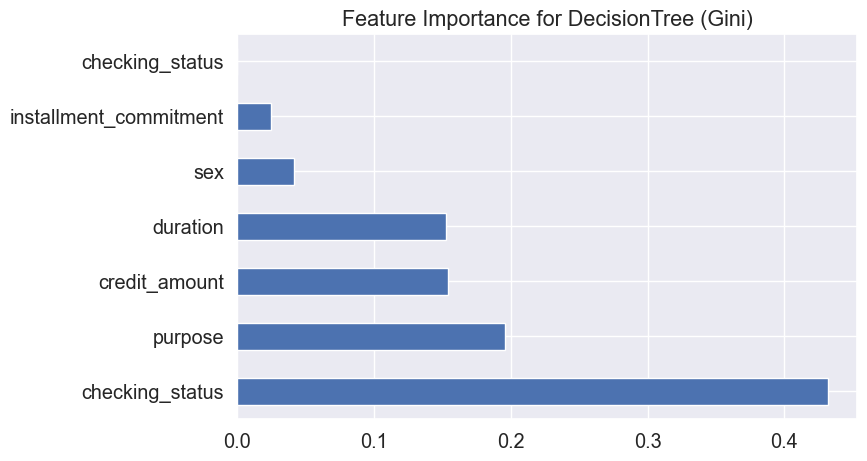

In [360]:
feature_imp_DT_Gini = pd.Series(tree_g.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp_DT_Gini.plot(kind='barh', title = 'Feature Importance for DecisionTree (Gini)', figsize=[8,5])

<Axes: title={'center': 'Feature Importance for DecisionTree (Entropy)'}>

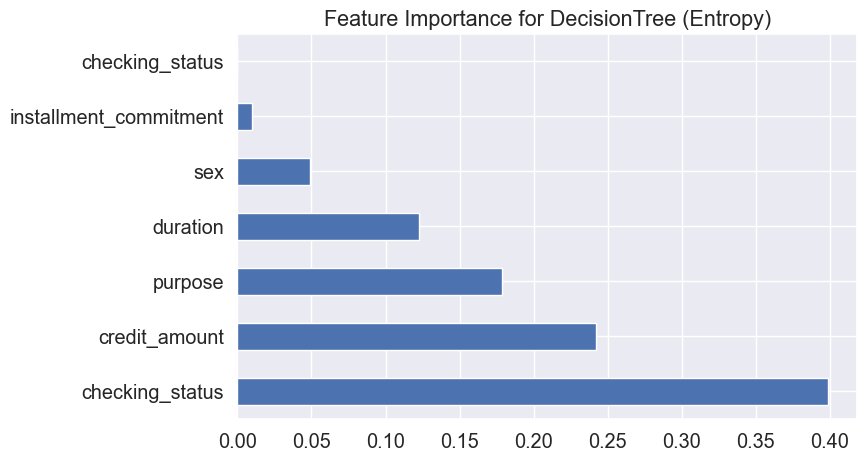

In [361]:
feature_imp_DT_entropy = pd.Series(tree_e.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp_DT_entropy.plot(kind='barh', title = 'Feature Importance for DecisionTree (Entropy)', figsize=[8,5])

<Axes: title={'center': 'Feature Importance for RandomForestClassifier'}>

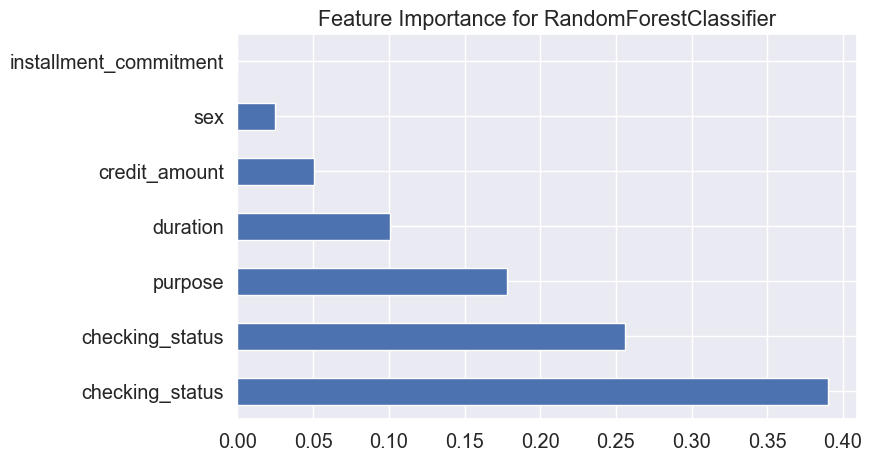

In [362]:
feature_imp_RFC = pd.Series(RFC.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp_RFC.plot(kind='barh', title = 'Feature Importance for RandomForestClassifier', figsize=[8,5])

<Axes: title={'center': 'Feature Importance for ExtraTreesClassifier'}>

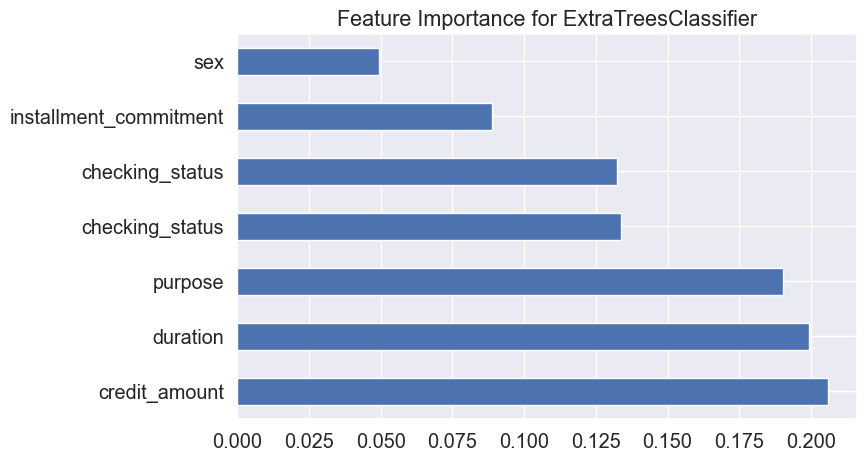

In [363]:
feature_imp_ET_CLF = pd.Series(ET_CLF.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp_ET_CLF.plot(kind='barh', title = 'Feature Importance for ExtraTreesClassifier', figsize=[8,5])

<Axes: title={'center': 'Feature Importance for AdaBoostClassifier'}>

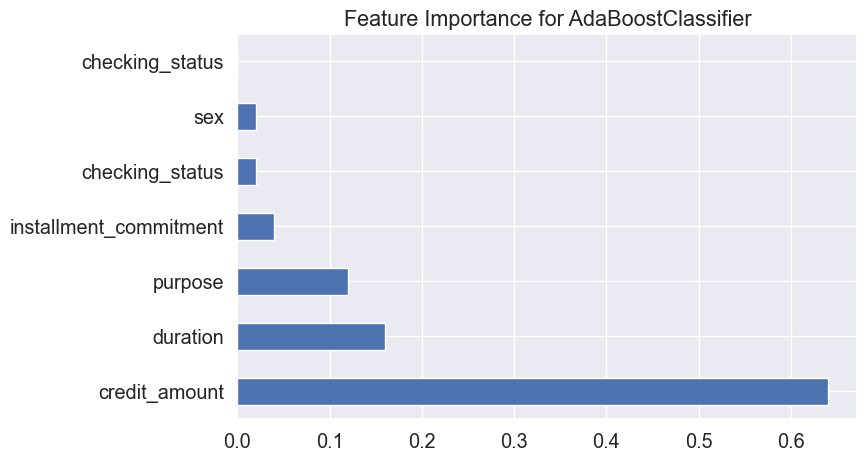

In [364]:
feature_imp_abc = pd.Series(abc.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp_abc.plot(kind='barh', title = 'Feature Importance for AdaBoostClassifier', figsize=[8,5])